<a href="https://colab.research.google.com/github/varshareddykumbham/Speech-Emotion-Recognition-using-RNN-LSTM/blob/main/RNN_LSTM_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/My Drive/ravdess_ser

/content/drive/My Drive/ravdess_ser


In [ ]:
import numpy as np
from keras.models import Sequential  
from keras.layers import Dense, Activation, GRU, Flatten, LSTM, Flatten,SimpleRNN
from keras.layers import Dropout, BatchNormalization, Bidirectional
from sklearn.model_selection import train_test_split  
from sklearn.metrics import confusion_matrix  
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
X=np.load('X.npy')  
y=np.load('y.npy')
X = X.reshape((X.shape[0], 1, X.shape[1]))
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)

# DNN layer units
n_dim = train_x.shape[2]  
n_classes = train_y.shape[1]
earlystop = EarlyStopping(monitor='val_acc', mode='max', patience=70, restore_best_weights=False)
checkpointer = ModelCheckpoint(filepath='/tmp/weights.hdf5', verbose=1, save_best_only=False)

# function to define model
def create_model():  
    model = Sequential()
    model.add(BatchNormalization(axis=-1, input_shape=(1, 193)))
    model.add(LSTM(n_dim, return_sequences=True, dropout=0.1, #input_shape=(1, 193),
                 recurrent_dropout=0.2))  
    model.add(LSTM(n_dim*2, dropout=0.1, recurrent_dropout=0.2, return_sequences=True,activation='tanh'))
    model.add(LSTM(n_dim, dropout=0.1, recurrent_dropout=0.2, return_sequences=True))
    model.add(Flatten())
    model.add(Dense(n_dim,activation='relu'))
    model.add(Dropout (0.2)) 
    model.add(Dense(n_classes, activation='softmax'))
              
    # model compilation  
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])  
    return model
   
# create the model  
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 1, 193)            772       
_________________________________________________________________
lstm (LSTM)                  (None, 1, 193)            298764    
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 386)            895520    
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 193)            447760    
_________________________________________________________________
flatten (Flatten)            (None, 193)               0         
_________________________________________________________________
dense (Dense)                (None, 193)               37442     
_________________________________________________________________
dropout (Dropout)            (None, 193)               0

In [ ]:
hist = model.fit(train_x, train_y, epochs=200, batch_size=32,validation_data=(test_x[:150], test_y[:150]), callbacks=[earlystop])
print(max(hist.history['accuracy']), max(hist.history['val_accuracy']))

evaluate = model.evaluate(test_x[150:], test_y[150:], batch_size=32)
print(evaluate)

Epoch 1/200
36/36 [==============================] - 9s 85ms/step - loss: 1.9840 - accuracy: 0.2008 - val_loss: 1.8332 - val_accuracy: 0.3000
Epoch 2/200
36/36 [==============================] - 2s 54ms/step - loss: 1.7220 - accuracy: 0.3263 - val_loss: 2.0614 - val_accuracy: 0.2400
Epoch 3/200
36/36 [==============================] - 2s 51ms/step - loss: 1.5731 - accuracy: 0.3806 - val_loss: 1.9422 - val_accuracy: 0.2600
Epoch 4/200
36/36 [==============================] - 2s 52ms/step - loss: 1.5221 - accuracy: 0.4362 - val_loss: 1.9834 - val_accuracy: 0.2867
Epoch 5/200
36/36 [==============================] - 2s 50ms/step - loss: 1.4644 - accuracy: 0.4389 - val_loss: 2.0624 - val_accuracy: 0.3400
Epoch 6/200
36/36 [==============================] - 2s 49ms/step - loss: 1.3769 - accuracy: 0.4906 - val_loss: 1.9149 - val_accuracy: 0.2733
Epoch 7/200
36/36 [==============================] - 2s 50ms/step - loss: 1.2860 - accuracy: 0.5269 - val_loss: 1.8032 - val_accuracy: 0.3200
Epoch 

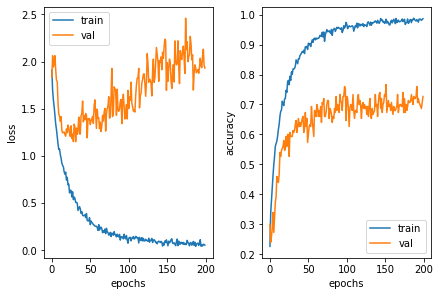

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True)
ax = axs[0]
ax.plot(hist.history['loss'], label='train')
ax.plot(hist.history['val_loss'], label='val')
ax.legend()
ax.set_ylabel('loss')
ax.set_xlabel('epochs')
ax = axs[1] 
ax.plot(hist.history['accuracy'], label='train')
ax.plot(hist.history['val_accuracy'], label='val')
ax.legend()
ax.set_ylabel('accuracy')
ax.set_xlabel('epochs')
plt.show()

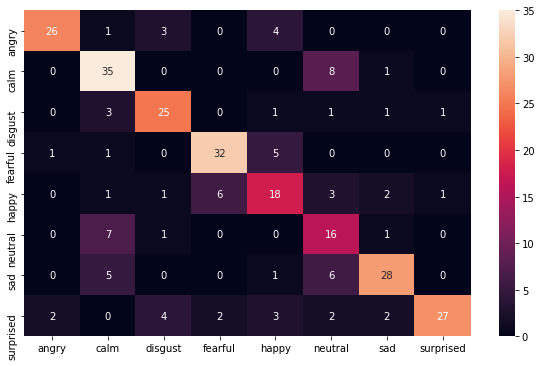

In [ ]:
predict = model.predict(test_x,batch_size=4)
emotions=['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised','others']  

# predicted emotions from the test set  
y_pred = np.argmax(predict, 1)  
predicted_emo = []   
for i in range(0,test_y.shape[0]):  
    emo = emotions[y_pred[i]]  
    predicted_emo.append(emo)
    
actual_emo = []  
y_true = np.argmax(test_y, 1)  
for i in range(0,test_y.shape[0]):  
    emo = emotions[y_true[i]]  
    actual_emo.append(emo)
        
# generate the confusion matrix  
cm = confusion_matrix(actual_emo, predicted_emo)  
index = ['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']  
columns = ['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']  
cm_df = pd.DataFrame(cm, index, columns)                      
plt.figure(figsize=(10,6))  
sns.heatmap(cm_df, annot=True)

In [ ]:
from sklearn.metrics import accuracy_score 
print('Accuracy Score :',accuracy_score(actual_emo, predicted_emo))

Accuracy Score : 0.71875
